In [3]:
import csv
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

original = {
    "0":[],
    "10":[],
    "20":[],
    "30":[],
    "40":["car"],
    "50":["car"],
    "60":["car"],
    "70":["car"],
    "80":["car"],
    "90":["car"],
    "100":["car"],
    "110":["car"],
    "120":["car"],
    "130":["car"],
    "140":["car"],
    "150":["car","person"],
    "160":["car"],
    "170":["car"],
    "180":["car"],
    "190":["car"]
}

bits = ["8", "12"]
p = [0.1,0.05, 0.01, 0.001, 0.0001]
layers = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14"]
layerResults = {
    
}

for frame in original:
    layerResults[frame] = {}
    for layer in layers:
        layerResults[frame][layer] = {}
        for p_ in p:
            layerResults[frame][layer][p_] = {}
            for bit in bits:
                if len(original[frame]) == 0:
                    layerResults[frame][layer][p_][bit] = "TN"
                else:
                    layerResults[frame][layer][p_][bit] = "FN"
#print layerResults
print layerResults["120"]["14"]

{0.01: {'8': 'FN', '12': 'FN'}, 0.001: {'8': 'FN', '12': 'FN'}, 0.0001: {'8': 'FN', '12': 'FN'}, 0.05: {'8': 'FN', '12': 'FN'}, 0.1: {'8': 'FN', '12': 'FN'}}


In [7]:

with open('/home/philipp/res_diff.csv', 'rb') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=';')
        for row in spamreader:
            #print row
            frame = row[0].split('_')[2]
            layer = row[0].split('_')[4]
            t = float(row[0].split("_")[6])
            bit = row[0].split("_")[7]
            #print frame + " " + layer + " " + str(t) + " " + bit
            detectedClass = row[1].split(":")[0].strip()
            detectedClass_p = row[1].split(":")[1]
            frameResults = original[frame];
            if detectedClass in frameResults:
                #print "TP: " + detectedClass
                if layerResults[frame][layer][t][bit] != "FP":
                    layerResults[frame][layer][t][bit] = "TP"
            else:
                #print "FP: '" + detectedClass + "' " + str(frameResults)
                layerResults[frame][layer][t][bit] = "FP"
            #print row



In [15]:
for frame in layerResults:
    for layer in layerResults[frame]:
        for t in layerResults[frame][layer]:
            for bit in layerResults[frame][layer][t]:
                if t == 0.001 and bit == "8" and layerResults[frame][layer][t] == "FP":
                    print frame + " " + layer + " " + str(t)

In [35]:
bitResults={}
# TN, TP, FN, FP
for p_ in p:
    bitResults[p_] = {}
    for bit in bits:
        bitResults[p_][int(bit)] = [0,0,0,0]

for frame in layerResults:
    for layer in layerResults[frame]:
        for t in layerResults[frame][layer]:
            for bit in layerResults[frame][layer][t]:
                result = layerResults[frame][layer][t][bit]
                #print result
                if result == "TN":
                         bitResults[t][int(bit)][0] += 1
                if result == "TP":
                         bitResults[t][int(bit)][1] += 1
                if result == "FN":
                         bitResults[t][int(bit)][2] += 1
                if result == "FP":
                         #print frame + " " + layer + " " + str(t) + " " + bi
                         bitResults[t][int(bit)][3] +=1

table = pd.DataFrame(bitResults)
sortedT = table.transpose()
#print sortedT
import StringIO
s = StringIO.StringIO()
sortedT.to_csv(s)
print s.getvalue()


print  pd.DataFrame(sortedT[12].values.tolist(), index= sortedT.index)


sortedT


,8,12
0.0001,"[60, 236, 3, 1]","[60, 239, 1, 0]"
0.001,"[58, 235, 4, 3]","[59, 236, 3, 2]"
0.01,"[57, 219, 9, 15]","[57, 220, 8, 15]"
0.05,"[57, 207, 15, 21]","[57, 204, 17, 22]"
0.1,"[56, 200, 20, 24]","[56, 200, 21, 23]"

         0    1   2   3
0.0001  60  239   1   0
0.0010  59  236   3   2
0.0100  57  220   8  15
0.0500  57  204  17  22
0.1000  56  200  21  23


,8,12
0.0001,"[60, 236, 3, 1]","[60, 239, 1, 0]"
0.0010,"[58, 235, 4, 3]","[59, 236, 3, 2]"
0.0100,"[57, 219, 9, 15]","[57, 220, 8, 15]"
0.0500,"[57, 207, 15, 21]","[57, 204, 17, 22]"
0.1000,"[56, 200, 20, 24]","[56, 200, 21, 23]"


In [57]:
LayerBitResults={}
# TN, TP, FN, FP
for layer in layers:
    LayerBitResults[layer] = {}
    for bit in bits:
        LayerBitResults[layer][bit] = [0,0,0,0]

for frame in layerResults:
    for layer in layerResults[frame]:
        for bit in layerResults[frame][layer]:
            result = layerResults[frame][layer][bit]
            #print result
            if result == "TN":
                     LayerBitResults[layer][bit][0] += 1
            if result == "TP":
                     LayerBitResults[layer][bit][1] += 1
            if result == "FN":
                     LayerBitResults[layer][bit][2] += 1
            if result == "FP":
                     LayerBitResults[layer][bit][3] +=1

                    


,1,12,16,2,24,32,4,6,8
0,"[4, 0, 16, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[3, 15, 1, 1]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 14, 2, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]"
1,"[4, 0, 16, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[2, 9, 7, 2]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 13, 2, 1]","[4, 15, 1, 0]","[4, 16, 0, 0]"
10,"[4, 0, 16, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 1, 15, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 13, 3, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]"
11,"[4, 0, 16, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 2, 14, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]"
12,"[4, 0, 16, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[3, 7, 8, 2]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 15, 1, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]"
13,"[4, 0, 16, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 1, 15, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 11, 5, 0]","[4, 15, 1, 0]","[4, 16, 0, 0]"
14,"[4, 0, 16, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[0, 0, 0, 20]","[4, 16, 0, 0]","[4, 16, 0, 0]",

,1,12,16,2,24,32,4,6,8
0,"[4, 0, 16, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[3, 15, 1, 1]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 14, 2, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]"
1,"[4, 0, 16, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[2, 9, 7, 2]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 13, 2, 1]","[4, 15, 1, 0]","[4, 16, 0, 0]"
10,"[4, 0, 16, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 1, 15, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 13, 3, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]"
11,"[4, 0, 16, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 2, 14, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]"
12,"[4, 0, 16, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[3, 7, 8, 2]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 15, 1, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]"
13,"[4, 0, 16, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 1, 15, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 11, 5, 0]","[4, 15, 1, 0]","[4, 16, 0, 0]"
14,"[4, 0, 16, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[0, 0, 0, 20]","[4, 16, 0, 0]","[4, 16, 0, 0]","[1, 4, 0, 15]","[3, 16, 0, 1]","[4, 16, 0, 0]"
2,"[0, 0, 0, 20]","[4, 16, 0, 0]","[4, 16, 0, 0]","[3, 11, 5, 1]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 14, 1, 1]","[4, 16, 0, 0]","[4, 16, 0, 0]"
3,"[0, 0, 0, 20]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 3, 13, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]"
4,"[4, 0, 16, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 3, 13, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 13, 2, 1]","[4, 15, 1, 0]","[4, 16, 0, 0]"


In [22]:
def accuracy(a): 
    acc = (a[1]+a[0])/(a[0]+a[1]+a[2]+a[3]*1.0)
    return acc

bitResults_acc = {}
for t in bitResults:
    print layer
    bitResults_acc[t]={}
    for k, v in bitResults[t].items():
        bitResults_acc[t][int(k)]=accuracy(v)
        



0.1
0.1
0.1
0.1
0.1
{0.1: {8: 0.8533333333333334, 12: 0.8533333333333334}, 0.001: {8: 0.9766666666666667, 12: 0.9833333333333333}, 0.0001: {8: 0.9866666666666667, 12: 0.9966666666666667}, 0.05: {8: 0.88, 12: 0.87}, 0.01: {8: 0.92, 12: 0.9233333333333333}}


In [23]:
table = pd.DataFrame.from_records(bitResults_acc,columns=["bits","accuracy"])
sortedT = table.sort_values(by=['bits'], ascending=False).reset_index(drop=True)
ax = sortedT.plot(y='accuracy', kind='line', x='bits', logx=True, xticks=sortedT['bits'])
ax.invert_xaxis() 
sortedT

TypeError: Empty 'DataFrame': no numeric data to plot

In [7]:
layer_acc = {}
for layer in LayerBitResults:
    layer_acc[int(layer)]={}
    for k, v in LayerBitResults[layer].items():
        layer_acc[int(layer)][int(k)]=accuracy(v)
print layer_acc

NameError: name 'LayerBitResults' is not defined

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,0.2,0.2,0.0,0.0,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
2,0.9,0.55,0.7,0.35,0.35,0.4,0.4,0.35,0.3,0.2,0.25,0.3,0.5,0.25,0.0
4,0.9,0.85,0.9,1.0,0.85,0.85,0.85,0.85,0.95,0.95,0.85,1.0,0.95,0.75,0.25
6,1.0,0.95,1.0,1.0,0.95,0.95,1.0,0.95,1.0,1.0,1.0,1.0,1.0,0.95,0.95
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
12,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
16,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
24,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
32,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,0.2,0.20,0.0,0.00,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.2,0.20,0.20,0.20
2,0.9,0.55,0.7,0.35,0.35,0.40,0.40,0.35,0.30,0.20,0.25,0.3,0.50,0.25,0.00
4,0.9,0.85,0.9,1.00,0.85,0.85,0.85,0.85,0.95,0.95,0.85,1.0,0.95,0.75,0.25
6,1.0,0.95,1.0,1.00,0.95,0.95,1.00,0.95,1.00,1.00,1.00,1.0,1.00,0.95,0.95
8,1.0,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00
12,1.0,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00
16,1.0,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00
24,1.0,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00
32,1.0,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00


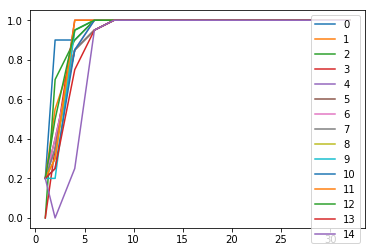

In [89]:
table = pd.DataFrame.from_dict(layer_acc)

ax = table.plot()
import StringIO
s = StringIO.StringIO()


table.to_csv(s)
print s.getvalue()
table

In [43]:
import os;
df = pd.DataFrame(dtype=float, columns=['layer','bit','size', 't'])
for f in os.listdir("/home/philipp/usb/projects/yolo2_light_partitioned/diff_comp/"):
    if not f.endswith("decomp"):
        print f
        layername = f.split("_")[3]
        bits = f.split("_")[6]
        t = f.split("_")[5]
        statinfo = os.stat("/home/philipp/usb/projects/yolo2_light_partitioned/diff_comp/"+f)
        size = statinfo.st_size
        df = df.append({'layer': int(layername), 'bit': int(bits), 't':float(t), 'size':int(size)}, ignore_index=True)



frame_60_layer_6_346112_0.001000_12_49
frame_130_layer_13_173056_0.001000_12_22
frame_70_layer_11_86528_0.010000_12_9
frame_190_layer_1_692224_0.000100_12_91
frame_110_layer_0_2768896_0.001000_12_310
frame_190_layer_9_43264_0.050000_12_4
frame_90_layer_7_86528_0.010000_8_10
frame_40_layer_8_173056_0.100000_12_9
frame_130_layer_0_2768896_0.001000_8_256
frame_80_layer_7_86528_0.001000_8_8
frame_170_layer_6_346112_0.010000_8_59
frame_40_layer_2_1384448_0.050000_12_154
frame_110_layer_7_86528_0.100000_8_5
frame_10_layer_11_86528_0.050000_8_3
frame_150_layer_3_346112_0.001000_8_35
frame_150_layer_14_21125_0.100000_8_1
frame_50_layer_9_43264_0.001000_12_5
frame_110_layer_10_86528_0.010000_12_10
frame_120_layer_2_1384448_0.010000_8_68
frame_80_layer_3_346112_0.000100_8_31
frame_10_layer_13_173056_0.010000_12_19
frame_190_layer_14_21125_0.001000_8_2
frame_90_layer_5_173056_0.100000_8_13
frame_150_layer_7_86528_0.000100_8_7
frame_180_layer_3_346112_0.000100_12_41
frame_100_layer_13_173056_0.001

frame_120_layer_15_21125_0.000100_8_2
frame_80_layer_8_173056_0.100000_8_10
frame_120_layer_7_86528_0.010000_12_12
frame_30_layer_15_21125_0.050000_8_0
frame_130_layer_15_21125_0.100000_12_0
frame_70_layer_3_346112_0.100000_12_31
frame_70_layer_6_346112_0.001000_12_39
frame_40_layer_3_346112_0.050000_8_33
frame_80_layer_7_86528_0.100000_8_5
frame_80_layer_10_86528_0.010000_12_12
frame_30_layer_3_346112_0.001000_8_42
frame_100_layer_6_346112_0.050000_8_33
frame_20_layer_7_86528_0.000100_12_15
frame_100_layer_3_346112_0.100000_12_36
frame_180_layer_2_1384448_0.001000_8_121
frame_40_layer_12_173056_0.010000_12_22
frame_170_layer_8_173056_0.100000_12_9
frame_60_layer_13_173056_0.000100_12_28
frame_160_layer_2_1384448_0.001000_8_120
frame_130_layer_13_173056_0.050000_12_17
frame_70_layer_15_21125_0.100000_8_1
frame_30_layer_11_86528_0.000100_12_10
frame_110_layer_15_21125_0.050000_12_1
frame_170_layer_15_21125_0.100000_8_0
frame_110_layer_10_86528_0.000100_8_7
frame_70_layer_4_692224_0.0001

frame_70_layer_13_173056_0.001000_12_23
frame_20_layer_5_173056_0.001000_8_16
frame_180_layer_3_346112_0.001000_12_43
frame_70_layer_9_43264_0.050000_12_3
frame_170_layer_14_21125_0.000100_12_3
frame_50_layer_8_173056_0.010000_8_20
frame_100_layer_5_173056_0.100000_8_19
frame_120_layer_3_346112_0.100000_8_26
frame_100_layer_5_173056_0.050000_12_32
frame_20_layer_2_1384448_0.010000_8_138
frame_130_layer_6_346112_0.001000_12_49
frame_90_layer_6_346112_0.050000_8_20
frame_180_layer_10_86528_0.001000_12_9
frame_80_layer_10_86528_0.001000_8_11
frame_110_layer_7_86528_0.050000_8_6
frame_110_layer_8_173056_0.001000_8_18
frame_150_layer_9_43264_0.010000_8_5
frame_190_layer_2_1384448_0.100000_12_107
frame_130_layer_10_86528_0.001000_12_11
frame_30_layer_5_173056_0.000100_8_18
frame_70_layer_7_86528_0.010000_12_8
frame_110_layer_11_86528_0.010000_8_8
frame_20_layer_14_21125_0.050000_12_4
frame_130_layer_10_86528_0.001000_8_9
frame_10_layer_6_346112_0.000100_8_39
frame_90_layer_14_21125_0.050000_

frame_180_layer_11_86528_0.100000_8_3
frame_130_layer_0_2768896_0.010000_8_196
frame_140_layer_7_86528_0.100000_8_5
frame_100_layer_15_21125_0.000100_12_1
frame_150_layer_8_173056_0.000100_12_19
frame_140_layer_13_173056_0.010000_8_17
frame_170_layer_5_173056_0.001000_12_23
frame_100_layer_14_21125_0.000100_8_3
frame_30_layer_4_692224_0.100000_8_58
frame_80_layer_15_21125_0.001000_8_1
frame_150_layer_6_346112_0.000100_8_38
frame_150_layer_12_173056_0.001000_8_16
frame_60_layer_3_346112_0.100000_12_36
frame_150_layer_8_173056_0.000100_8_18
frame_60_layer_5_173056_0.100000_8_15
frame_20_layer_0_2768896_0.001000_8_242
frame_130_layer_6_346112_0.100000_8_17
frame_140_layer_0_2768896_0.010000_12_319
frame_140_layer_6_346112_0.001000_8_30
frame_50_layer_14_21125_0.000100_12_2
frame_20_layer_1_692224_0.050000_12_54
frame_160_layer_10_86528_0.001000_12_10
frame_140_layer_0_2768896_0.001000_8_213
frame_170_layer_14_21125_0.100000_8_2
frame_80_layer_12_173056_0.050000_12_18
frame_130_layer_4_692

frame_110_layer_10_86528_0.001000_12_11
frame_50_layer_6_346112_0.000100_12_36
frame_180_layer_7_86528_0.100000_8_6
frame_90_layer_7_86528_0.001000_12_12
frame_140_layer_2_1384448_0.000100_8_124
frame_50_layer_7_86528_0.050000_8_7
frame_20_layer_12_173056_0.050000_8_14
frame_80_layer_7_86528_0.001000_12_9
frame_100_layer_9_43264_0.001000_12_5
frame_160_layer_10_86528_0.050000_8_5
frame_190_layer_14_21125_0.100000_12_2
frame_60_layer_14_21125_0.001000_12_2
frame_80_layer_5_173056_0.010000_8_17
frame_130_layer_2_1384448_0.100000_12_117
frame_60_layer_6_346112_0.010000_8_19
frame_170_layer_15_21125_0.050000_8_1
frame_180_layer_1_692224_0.000100_8_48
frame_60_layer_3_346112_0.000100_8_39
frame_130_layer_6_346112_0.000100_8_33
frame_40_layer_13_173056_0.050000_12_20
frame_100_layer_6_346112_0.050000_12_39
frame_140_layer_1_692224_0.050000_8_45
frame_190_layer_13_173056_0.100000_8_12
frame_50_layer_7_86528_0.010000_8_5
frame_20_layer_6_346112_0.000100_8_42
frame_130_layer_9_43264_0.100000_8_

frame_100_layer_12_173056_0.001000_12_32
frame_70_layer_0_2768896_0.010000_12_239
frame_160_layer_7_86528_0.001000_12_14
frame_180_layer_11_86528_0.050000_12_9
frame_20_layer_2_1384448_0.010000_12_178
frame_40_layer_4_692224_0.050000_8_57
frame_130_layer_13_173056_0.001000_8_17
frame_20_layer_5_173056_0.010000_12_14
frame_90_layer_11_86528_0.050000_12_6
frame_130_layer_11_86528_0.001000_12_9
frame_140_layer_13_173056_0.000100_8_19
frame_80_layer_1_692224_0.050000_8_34
frame_40_layer_14_21125_0.050000_12_2
frame_70_layer_1_692224_0.050000_8_46
frame_170_layer_0_2768896_0.100000_12_156
frame_180_layer_0_2768896_0.050000_12_225
frame_10_layer_15_21125_0.000100_8_2
frame_170_layer_15_21125_0.050000_12_1
frame_190_layer_13_173056_0.010000_12_28
frame_150_layer_13_173056_0.050000_12_12
frame_70_layer_9_43264_0.001000_12_7
frame_50_layer_4_692224_0.001000_8_70
frame_30_layer_3_346112_0.050000_8_25
frame_150_layer_2_1384448_0.010000_8_120
frame_10_layer_5_173056_0.001000_12_19
frame_80_layer_4

frame_60_layer_6_346112_0.100000_12_25
frame_130_layer_4_692224_0.001000_8_71
frame_30_layer_14_21125_0.010000_12_2
frame_170_layer_10_86528_0.100000_8_4
frame_80_layer_12_173056_0.000100_8_20
frame_130_layer_7_86528_0.050000_12_8
frame_40_layer_15_21125_0.050000_8_1
frame_150_layer_0_2768896_0.000100_12_299
frame_110_layer_14_21125_0.001000_12_3
frame_160_layer_13_173056_0.001000_8_17
frame_100_layer_12_173056_0.050000_8_7
frame_20_layer_14_21125_0.050000_8_3
frame_170_layer_8_173056_0.001000_12_16
frame_130_layer_15_21125_0.050000_8_1
frame_80_layer_8_173056_0.000100_12_22
frame_150_layer_4_692224_0.050000_8_48
frame_30_layer_2_1384448_0.000100_12_175
frame_180_layer_15_21125_0.100000_12_1
frame_170_layer_0_2768896_0.000100_8_326
frame_40_layer_6_346112_0.010000_8_48
frame_50_layer_2_1384448_0.000100_8_135
frame_80_layer_0_2768896_0.001000_12_282
frame_130_layer_12_173056_0.000100_8_17
frame_30_layer_11_86528_0.010000_8_8
frame_60_layer_12_173056_0.050000_8_24
frame_110_layer_13_1730

frame_140_layer_8_173056_0.010000_12_20
frame_150_layer_12_173056_0.000100_12_41
frame_20_layer_3_346112_0.010000_12_44
frame_70_layer_9_43264_0.100000_8_2
frame_160_layer_7_86528_0.100000_12_7
frame_90_layer_2_1384448_0.001000_12_146
frame_190_layer_10_86528_0.100000_12_5
frame_160_layer_10_86528_0.001000_8_9
frame_30_layer_13_173056_0.000100_8_10
frame_90_layer_0_2768896_0.001000_12_343
frame_150_layer_5_173056_0.000100_8_18
frame_120_layer_7_86528_0.000100_12_11
frame_60_layer_14_21125_0.010000_8_2
frame_50_layer_7_86528_0.001000_12_12
frame_10_layer_0_2768896_0.100000_8_126
frame_160_layer_13_173056_0.000100_12_23
frame_20_layer_10_86528_0.000100_12_11
frame_180_layer_12_173056_0.000100_12_20
frame_30_layer_0_2768896_0.010000_8_243
frame_30_layer_5_173056_0.050000_12_18
frame_90_layer_12_173056_0.000100_8_9
frame_90_layer_7_86528_0.100000_12_8
frame_110_layer_9_43264_0.050000_8_3
frame_70_layer_5_173056_0.001000_12_19
frame_170_layer_14_21125_0.000100_8_2
frame_10_layer_6_346112_0.

frame_110_layer_3_346112_0.010000_8_27
frame_60_layer_4_692224_0.100000_8_45
frame_50_layer_14_21125_0.010000_12_5
frame_10_layer_8_173056_0.000100_12_44
frame_130_layer_8_173056_0.050000_12_13
frame_50_layer_9_43264_0.050000_8_3
frame_100_layer_13_173056_0.050000_8_15
frame_190_layer_14_21125_0.050000_8_2
frame_70_layer_10_86528_0.010000_8_8
frame_30_layer_3_346112_0.010000_12_41
frame_50_layer_10_86528_0.050000_8_5
frame_10_layer_8_173056_0.100000_8_5
frame_150_layer_10_86528_0.100000_8_2
frame_130_layer_7_86528_0.100000_8_4
frame_100_layer_1_692224_0.001000_12_85
frame_90_layer_14_21125_0.050000_8_2
frame_110_layer_2_1384448_0.000100_12_162
frame_80_layer_2_1384448_0.001000_12_159
frame_170_layer_4_692224_0.050000_8_57
frame_150_layer_2_1384448_0.050000_8_118
frame_40_layer_5_173056_0.010000_8_1
frame_50_layer_4_692224_0.100000_8_49
frame_100_layer_7_86528_0.050000_8_9
frame_20_layer_3_346112_0.100000_12_27
frame_150_layer_2_1384448_0.000100_8_115
frame_120_layer_4_692224_0.100000_8

frame_110_layer_10_86528_0.000100_12_10
frame_10_layer_7_86528_0.010000_12_10
frame_30_layer_9_43264_0.100000_12_3
frame_180_layer_4_692224_0.001000_12_74
frame_50_layer_10_86528_0.050000_12_5
frame_40_layer_8_173056_0.050000_8_12
frame_70_layer_14_21125_0.000100_12_2
frame_100_layer_7_86528_0.001000_12_9
frame_50_layer_6_346112_0.000100_8_33
frame_180_layer_0_2768896_0.000100_12_327
frame_110_layer_1_692224_0.000100_12_92
frame_150_layer_0_2768896_0.001000_12_330
frame_30_layer_13_173056_0.100000_12_16
frame_90_layer_5_173056_0.100000_12_15
frame_130_layer_14_21125_0.100000_12_2
frame_30_layer_7_86528_0.100000_8_7
frame_180_layer_2_1384448_0.050000_12_124
frame_180_layer_0_2768896_0.100000_12_152
frame_10_layer_2_1384448_0.010000_12_157
frame_40_layer_8_173056_0.001000_12_29
frame_50_layer_9_43264_0.050000_12_4
frame_50_layer_0_2768896_0.001000_8_269
frame_170_layer_12_173056_0.050000_12_17
frame_20_layer_15_21125_0.001000_8_1
frame_100_layer_1_692224_0.000100_8_62
frame_60_layer_0_27

frame_180_layer_9_43264_0.000100_12_5
frame_140_layer_15_21125_0.001000_8_2
frame_50_layer_14_21125_0.001000_8_1
frame_80_layer_0_2768896_0.100000_8_110
frame_110_layer_4_692224_0.010000_12_63
frame_130_layer_0_2768896_0.001000_12_357
frame_20_layer_11_86528_0.000100_12_7
frame_90_layer_11_86528_0.050000_8_5
frame_50_layer_7_86528_0.000100_12_11
frame_30_layer_11_86528_0.050000_8_5
frame_180_layer_10_86528_0.010000_8_9
frame_20_layer_11_86528_0.100000_8_1
frame_110_layer_6_346112_0.100000_8_17
frame_170_layer_10_86528_0.100000_12_4
frame_70_layer_8_173056_0.001000_8_13
frame_160_layer_9_43264_0.050000_8_3
frame_170_layer_10_86528_0.050000_8_3
frame_40_layer_5_173056_0.100000_12_0
frame_100_layer_15_21125_0.001000_8_1
frame_170_layer_13_173056_0.050000_12_18
frame_40_layer_3_346112_0.001000_12_46
frame_180_layer_11_86528_0.100000_12_4
frame_190_layer_4_692224_0.001000_8_51
frame_30_layer_10_86528_0.000100_12_11
frame_190_layer_15_21125_0.050000_8_0
frame_140_layer_13_173056_0.100000_8_1

frame_170_layer_1_692224_0.001000_12_79
frame_60_layer_14_21125_0.010000_12_2
frame_10_layer_8_173056_0.050000_12_12
frame_160_layer_11_86528_0.100000_8_6
frame_110_layer_6_346112_0.000100_8_37
frame_70_layer_13_173056_0.010000_12_30
frame_120_layer_14_21125_0.010000_12_2
frame_30_layer_6_346112_0.001000_8_38
frame_150_layer_5_173056_0.000100_12_23
frame_110_layer_13_173056_0.000100_12_24
frame_80_layer_15_21125_0.010000_8_1
frame_60_layer_9_43264_0.100000_12_4
frame_20_layer_1_692224_0.100000_8_32
frame_190_layer_6_346112_0.000100_12_51
frame_90_layer_15_21125_0.050000_8_1
frame_10_layer_5_173056_0.100000_12_14
frame_100_layer_2_1384448_0.010000_12_139
frame_140_layer_1_692224_0.010000_12_78
frame_190_layer_5_173056_0.010000_8_19
frame_70_layer_2_1384448_0.010000_12_168
frame_140_layer_6_346112_0.000100_12_49


In [44]:
avgTable = df.loc[df['bit'].isin([2,6,12,24])].groupby(['layer','bit']).mean().transpose()
avgTable

layer,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0
bit,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0
size,3.386289e+06,865847.242105,1.954390e+06,501800.421053,994591.578947,246418.021053,453548.968421,122108.126316,218479.073684,59769.347368,106586.021053,108493.136842,258437.557895,254443.452632,32727.663158,24273.094737
t,3.222000e-02,0.032220,3.222000e-02,0.032220,0.032220,0.032220,0.032220,0.032220,0.032220,0.032220,0.032220,0.032220,0.032220,0.032220,0.032220,0.032220


In [47]:
avgTable = df.groupby(['t','bit']).mean()
avgTable

layer           size
t      bit                       
0.0001 8.0     7.5  458108.710526
       12.0    7.5  684112.763158
0.0010 8.0     7.5  463550.289474
       12.0    7.5  689808.789474
0.0100 8.0     7.5  457391.657895
       12.0    7.5  672232.526316
0.0500 8.0     7.5  359380.289474
       12.0    7.5  522795.842105
0.1000 8.0     7.5  295300.447368
       12.0    7.5  427363.447368

In [48]:
s = StringIO.StringIO()


avgTable.to_csv(s)
print s.getvalue()

t,bit,layer,size
0.0001,8.0,7.5,458108.7105263158
0.0001,12.0,7.5,684112.7631578947
0.001,8.0,7.5,463550.2894736842
0.001,12.0,7.5,689808.7894736842
0.01,8.0,7.5,457391.65789473685
0.01,12.0,7.5,672232.5263157894
0.05,8.0,7.5,359380.2894736842
0.05,12.0,7.5,522795.84210526315
0.1,8.0,7.5,295300.44736842107
0.1,12.0,7.5,427363.44736842107

